### WorldCloud
WorldCloud or TagCloud is a technique used to represent the frequency or the importance of each word.


Unbalanced data:

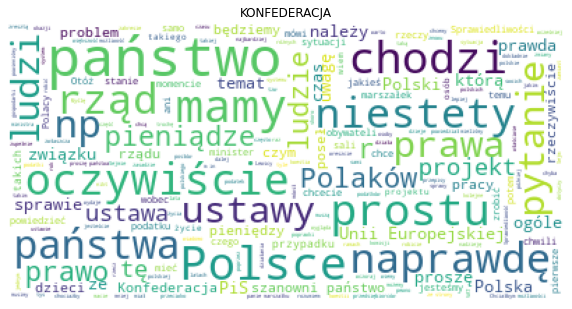

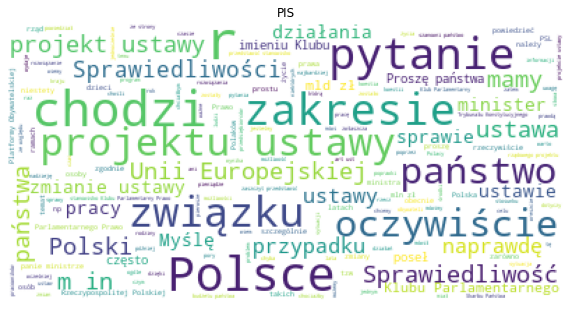

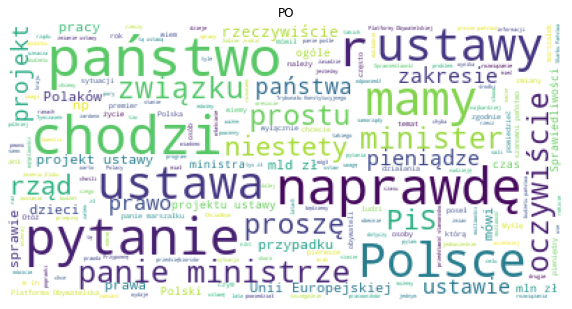

In [2]:
import pandas as pd
from many_stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import glob2
import re

# get stop words for polish language
stop_words = get_stop_words('pl')
stop_words.add("Dziękuję")

parties_names=["konfederacja","pis","po"]
filenames_of_parties = [glob2.glob(f'../data/sejm_speeches_sorted_parties/{party}/*.txt') for party in parties_names ]
filenames = glob2.glob('../data/sejm_speeches_sorted_parties/konfederacja/*.txt')

for party_files in filenames_of_parties:
    # for each party concatenate all speeches
    conncatenated_texts = ''.join([open(f,'r',encoding="utf-8").read() for f in party_files])

    # create worldcloud
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stop_words,
                    max_words=200,
                    max_font_size=40,
                    random_state=42
    ).generate(conncatenated_texts)

    print(wordcloud)
    plt.figure(figsize=(10,8))
    plt.title(re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]',party_files[0])[-3].upper())
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Balanced data
For a balanced data set, we can see that there are similar most common words in each political party. In addition, it can be noticed that with dirty data, not subjected to lemmatization, a large part of the most frequently used words overlap, but the contexts probably differ.

In [3]:
parties_names=["konfederacja","pis","po"]

def get_world_cloud(party):
    df = pd.read_csv(f'../data/sejm-speeches-sored-balanced/{party}.csv')

    # for each party concatenate all speeches
    conncatenated_texts = ''.join([ row["Speech"]  for i,row in df.iterrows()])

    # create worldcloud
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords=stop_words,
                    max_words=200,
                    max_font_size=40,
                    random_state=42
    ).generate(conncatenated_texts)

    print(wordcloud)
    plt.figure(figsize=(10,8))
    plt.title(party)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

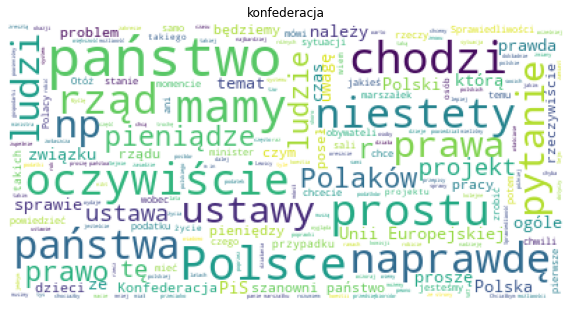

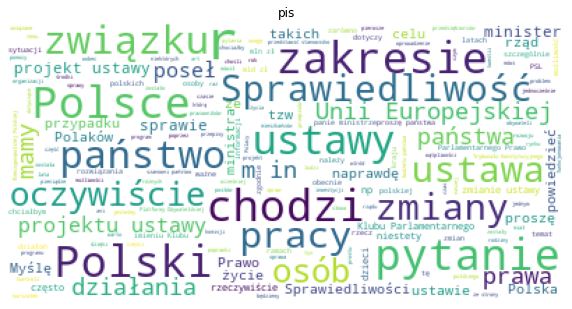

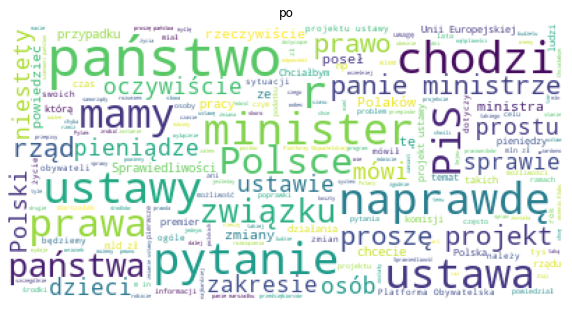

In [5]:
for party in parties_names:
    get_world_cloud(party)